# Demo of Anisotropic Noise Problem

In [1]:
#%matplotlib ipympl

In [2]:
from typing import List, Any, Tuple, Callable, Union
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import pandas as pd

In [3]:
# set font to Times New Roman
LATEX = False
if LATEX:
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams["font.family"] = "serif"
    mpl.rcParams["font.serif"] = "Times"
else:
    mpl.rcParams['text.usetex'] = False
    mpl.rcParams["font.family"] = "Times New Roman"
    mpl.rcParams["mathtext.fontset"] = "stix"
    
plt.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['savefig.dpi'] = 300

mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['figure.titleweight'] = 'bold'

#import matplotlib_inline.backend_inline
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

I generate vectors of random numbers within different ranges to use as "samples" for noise calculation. Notice the "shape" of the input vector, which has small variance on the edges and high variance in the middle. I intentionally made the shape easy to recognize and non-symmetric to demonstrate how the noise outputs are not in the correct order.

You can change sample_once to change the vectors used.

In [4]:
def sample_once() -> np.ndarray:
    """
    Mock query function that returns a vector for debugging composed of random integers
    sampled from different ranges.
    """
    a = int(np.random.normal(0, 1) * 10)
    b = int(np.random.normal(0, 1) * 10)
    c = int(np.random.normal(0, 1) * 50)

    # make the ideal basis rotated by 45 degrees

    # mat = np.array([a, b, c])
    #proj = np.array([[3, 1, 1], [-1, 2, 1], [-1/2, -2, 7/2]])

    rot_45_x = np.array([[1, 0, 0], [0, math.cos(math.pi/4), -math.sin(math.pi/4)], [0, math.sin(math.pi/4), math.cos(math.pi/4)]])
    a, b, c = np.dot(rot_45_x, np.array([a, b, c]))
    
    # a, b, c = np.dot(proj, np.array([a, b, c]))
    # a, b, c = np.dot(np.linalg.inv(proj), np.array([a, b, c]))

    return np.array([a, b, c])

sample_once()

array([  3.        , -43.13351365,   4.94974747])

Here's a visualization of the "shape" of the input vector, produced by averaging 1000 samples.

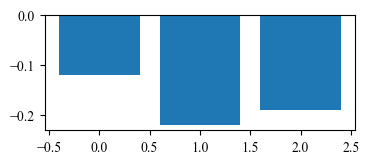

In [5]:
fig, ax = plt.subplots(figsize=(4, 1.5))
avg_sample = np.mean([sample_once() for _ in range(1000)], axis=0)
plt.bar(range(len(avg_sample)), avg_sample)
plt.show()

In [6]:
def set_axes_equal(ax):
    """
    Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    """

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

In [7]:
# import df from pickle
df = pd.read_pickle("svd_results.pkl")
df

,Sample Size,Variance,Sum of Eigenvalues,Sum of Square Root of Eigenvalues
0,10,"[101.14787996975527, 2132.829979742635, 1483.6...",4130.722222,81.070316
1,10,"[162.6613061171173, 605.1726733279261, 816.426...",1760.288889,57.291452
2,10,"[2146.6710578760944, 473.81846181716656, 202.8...",3137.088889,70.225999
3,10,"[181.03220229737795, 965.3640561240275, 549.02...",1883.800000,55.559303
4,10,"[92.52296623890881, 774.3265265789404, 364.570...",1368.244444,54.320346
...,...,...,...,...
295,1000000,"[379.6734409217464, 1131.7372197276688, 1131.3...",2642.754546,68.778986
296,1000000,"[2079.748096665184, 281.9060436521825, 281.637...",2643.293800,68.816737
297,1000000,"[1484.529987201959, 581.0095084374097, 580.690...",2646.232846,68.842189
298,1000000,"[107.37108876139983, 1270.3632333563671, 1271....",2648.811071,68.873487


In [8]:
# df2 is sample size vs variance[0]
df2 = df[["Sample Size", "Variance"]].copy()
df2["Variance 1"] = df2["Variance"].apply(lambda x: x[0])
df2["Variance 2"] = df2["Variance"].apply(lambda x: x[1])
df2["Variance 3"] = df2["Variance"].apply(lambda x: x[2])

df2

,Sample Size,Variance,Variance 1,Variance 2,Variance 3
0,10,"[101.14787996975527, 2132.829979742635, 1483.6...",101.147880,2132.829980,1483.672140
1,10,"[162.6613061171173, 605.1726733279261, 816.426...",162.661306,605.172673,816.426021
2,10,"[2146.6710578760944, 473.81846181716656, 202.8...",2146.671058,473.818462,202.890480
3,10,"[181.03220229737795, 965.3640561240275, 549.02...",181.032202,965.364056,549.023742
4,10,"[92.52296623890881, 774.3265265789404, 364.570...",92.522966,774.326527,364.570507
...,...,...,...,...,...
295,1000000,"[379.6734409217464, 1131.7372197276688, 1131.3...",379.673441,1131.737220,1131.341242
296,1000000,"[2079.748096665184, 281.9060436521825, 281.637...",2079.748097,281.906044,281.637017
297,1000000,"[1484.529987201959, 581.0095084374097, 580.690...",1484.529987,581.009508,580.690704
298,1000000,"[107.37108876139983, 1270.3632333563671, 1271....",107.371089,1270.363233,1271.074100


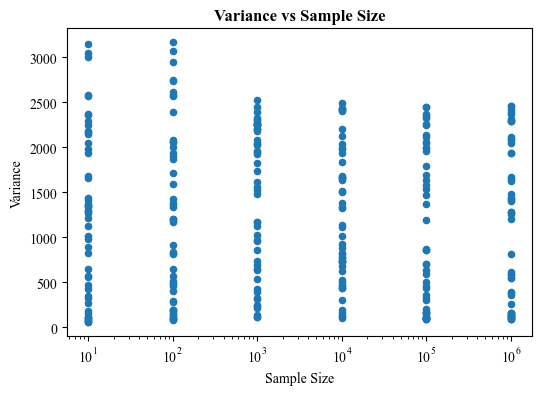

In [28]:
# plot variance 1,2,3 vs sample size
fig, ax = plt.subplots(figsize=(6, 4))
df2.plot.scatter(x="Sample Size", y="Variance 1", ax=ax, logx=True)
plt.ylabel("Variance")
plt.title("Variance vs Sample Size")
plt.savefig("figs/anisotropic/variance_vs_sample_size.png")

In [10]:
data = np.array([sample_once() for _ in range(100000)])

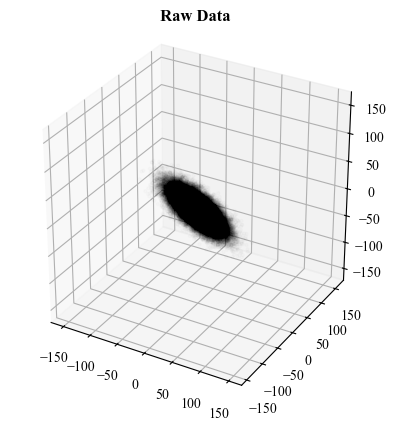

In [23]:
# 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs, ys, zs = data.T
ax.scatter(xs, ys, zs, c='black', marker='.', alpha=0.01)
#ax.set_box_aspect((np.ptp(xs), np.ptp(ys), np.ptp(zs)))

# Create cubic bounding box to simulate equal aspect ratio
max_range = np.array([np.ptp(xs), np.ptp(ys), np.ptp(zs)]).max()
Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(xs.max()+xs.min())
Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(ys.max()+ys.min())
Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(zs.max()+zs.min())
# Comment or uncomment following both lines to test the fake bounding box:
for xb, yb, zb in zip(Xb, Yb, Zb):
    ax.plot([xb], [yb], [zb], 'w')

ax.set_box_aspect([1.0, 1.0, 1.0])
set_axes_equal(ax)

plt.title("Raw Data")
plt.savefig("figs/anisotropic/raw_data.png")
plt.show()

49.70475336343143


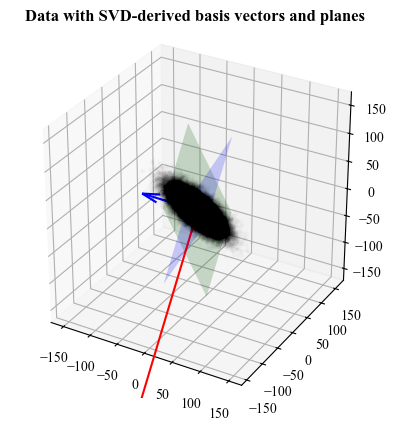

In [30]:
y_cov: np.ndarray = np.atleast_2d(np.cov(data.T))
u, eigs, u_t = np.linalg.svd(y_cov)
print(np.sum(np.sqrt(np.linalg.norm(eigs))))

basis_vectors = u

#data2 = np.array([np.dot(u, d) for d in data])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs, ys, zs = data.T
ax.scatter(xs, ys, zs, c='black', marker='.', alpha=0.01)
ax.set_box_aspect((np.ptp(xs), np.ptp(ys), np.ptp(zs)))

center = np.mean(data, axis=0)
max_range = np.array([xs.max()-xs.min(), ys.max()-ys.min(), zs.max()-zs.min()]).max()
#plane_size = 40

for i, color in zip(range(3), ['r', 'g', 'b']):
    # plot eigenvector
    length = np.sqrt(eigs[i]) * 10
    plane_size = math.ceil(eigs[i] ** -0.5) * 40
    ax.quiver(*center, *basis_vectors[i], color=color, length=length)
    
    # plot plane perpendicular to eigenvector
    normal = basis_vectors[i]
    d = -np.dot(normal, center)
    xx, yy = np.meshgrid(range(-plane_size, plane_size), range(-plane_size, plane_size))
    zz = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]
    ax.plot_surface(xx, yy, zz, alpha=0.2, color=color)

# Create cubic bounding box to simulate equal aspect ratio
Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(xs.max()+xs.min())
Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(ys.max()+ys.min())
Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(zs.max()+zs.min())
# Comment or uncomment following both lines to test the fake bounding box:
for xb, yb, zb in zip(Xb, Yb, Zb):
   ax.plot([xb], [yb], [zb], 'w')

ax.set_box_aspect([1.0, 1.0, 1.0])
set_axes_equal(ax)

plt.title("Data with SVD-derived basis vectors and planes")

plt.show()

Sample size 100000


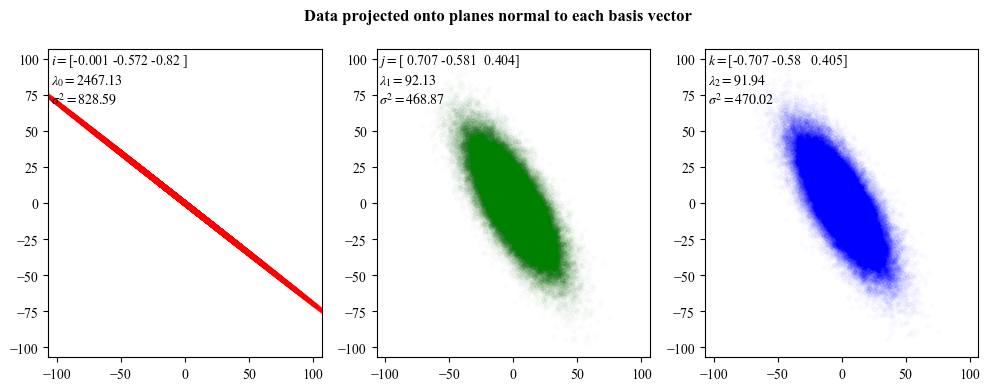

In [13]:
print("Sample size", len(data))

y_cov: np.ndarray = np.atleast_2d(np.cov(data.T))
u, eigs, u_t = np.linalg.svd(y_cov)
basis_vectors = u

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# project onto the plane of the first two eigenvectors

for name, i, color in zip(['i','j','k'], range(3), ['r', 'g', 'b']):
    v = basis_vectors[i]

    proj_v = np.eye(3) - np.outer(v, v) / np.dot(v, v)
    data_proj_v = np.matmul(data, proj_v)

    axs[i].scatter(data_proj_v[:, 1], data_proj_v[:, 2], c=color, marker='.', alpha=0.01)
    with np.printoptions(precision=3, suppress=True):
        plt.text(.01, .99, f'${name}=${v}\n$\lambda_{i}={eigs[i]:.2f}$\n$\sigma^2={np.var(data_proj_v):.2f}$', ha='left', va='top', transform=axs[i].transAxes)

    # title is vector
    
    
# make all axes equal
ranges = [np.ptp(data_proj_v[:, d]) for d in range(3)]
max_range = max(ranges)
for ax in axs:
    ax.set_xlim(-max_range/2, max_range/2)
    ax.set_ylim(-max_range/2, max_range/2)

plt.suptitle("Data projected onto planes normal to each basis vector")
plt.savefig("figs/anisotropic/projection_onto_basis.png")


[[-2.06629185e-05  1.42374461e-02 -1.42345961e-02]
 [-5.95644898e-02 -6.04797327e-02 -6.04053779e-02]
 [-8.55635152e-02  4.20939803e-02  4.22266120e-02]]


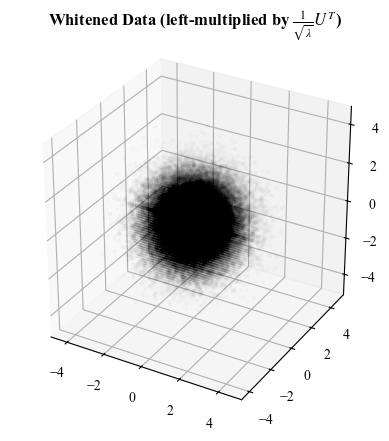

In [22]:
y_cov: np.ndarray = np.atleast_2d(np.cov(data.T))
u, eigs, u_t = np.linalg.svd(y_cov)

# sphere the data as (eigs ^ -0.5) * u_t * data
sphere_basis = np.matmul(np.diag(1 / np.sqrt(eigs)), u_t)

print(sphere_basis)

data2 = np.array([np.matmul(sphere_basis, d) for d in data])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs, ys, zs = np.array(data2).T
ax.scatter(xs, ys, zs, c='black', marker='.', alpha=0.01)
ax.set_box_aspect((np.ptp(xs), np.ptp(ys), np.ptp(zs)))

center = np.mean(data, axis=0)
max_range = np.array([xs.max()-xs.min(), ys.max()-ys.min(), zs.max()-zs.min()]).max()
plane_size = 40

# Create cubic bounding box to simulate equal aspect ratio
Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(xs.max()+xs.min())
Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(ys.max()+ys.min())
Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(zs.max()+zs.min())
# Comment or uncomment following both lines to test the fake bounding box:
for xb, yb, zb in zip(Xb, Yb, Zb):
   ax.plot([xb], [yb], [zb], 'w')

ax.set_box_aspect([1.0, 1.0, 1.0])
set_axes_equal(ax)

plt.title(r"Whitened Data (left-multiplied by $\frac{1}{\sqrt{\lambda}} U^T$)")
plt.savefig("figs/anisotropic/whitened.png")
plt.show()

This is the noise calculation method from pacdb/main.py, copied here for easy manipulation. If you change the function in this cell below and then re-run the cell, the function should be redefined, allowing you to change it iteratively and see the effects.

In [15]:
def estimate_hybrid_noise_static(
        sample_once: Callable[[], np.ndarray],
        max_mi: float = 1./4,
        anisotropic: bool = False,
        eta: float = 0.05
        ) -> Tuple[List[float], List[Any]]:
    

    # Use the identity matrix for our projection matrix
    dimensions = len(sample_once())
    proj_matrix: np.ndarray = np.eye(dimensions)

    # If no projection matrix is supplied, compute one
    BASIS_SAMPLES = 500
    if anisotropic:
        # 1. COLLECT SAMPLES
        outputs: List[np.ndarray] = [sample_once() for _ in range(BASIS_SAMPLES)]

        # 2. COVARIANCE MATRIX
        y_cov: np.ndarray = np.atleast_2d(np.cov(np.array(outputs).T))

        # 3. PROJECTION MATRIX (from SVD of covariance matrix)
        u, eigs, u_t = np.linalg.svd(y_cov)
        proj_matrix = u
        print(proj_matrix)
    else:
        proj_matrix = np.eye(dimensions)

    # projected samples used to estimate variance in each basis direction
    # est_y[i] is a list of magnitudes of the outputs in the i-th basis direction
    est_y: List[List[np.ndarray]] = [[] for _ in range(dimensions)]
    prev_ests: List[Union[float, np.floating[Any]]] = [np.inf for _ in range(dimensions)] # only to measure change per iteration for convergence

    converged = False
    curr_trial = 0

    while not converged:
        output: np.ndarray = sample_once()
        assert len(output) == dimensions

        if anisotropic:
            # project output into the basis of the proj_matrix
            output = np.matmul(proj_matrix, output)
        
        # Compute the magnitude of the output in each of the basis directions, update the estimate lists
        for i in range(len(output)):
            est_y[i].append(output[i])

        # Every 10 trials, check for convergence
        if curr_trial % 10 == 0:
            # If all dimensions' variance estimates changed by less than eta, we have converged
            if all(abs(np.var(est_y[i]) - prev_ests[i]) <= eta for i in range(dimensions)):
                converged = True
            else:
                # we have not converged, so update the previous estimates and continue
                prev_ests = [np.var(est_y[i]) for i in range(dimensions)]
        curr_trial += 1

    # Now that we have converged, get the variance in each basis direction
    fin_var: List[np.floating[Any]] = [np.var(est_y[i]) for i in range(dimensions)]
    # and the mean in each basis direction
    fin_mean: List[np.floating[Any]] = [np.mean(est_y[i]) for i in range(dimensions)]

    sqrt_total_var = sum([fin_var[x]**0.5 for x in range(len(fin_var))])

    noise: np.ndarray = np.array([np.inf for _ in range(dimensions)])
    for i in range(dimensions):
        noise[i] = float(1./(2*max_mi) * fin_var[i]**0.5 * sqrt_total_var)

    if anisotropic:
        # Project noise back to the original basis
        noise = np.abs(np.matmul(np.linalg.inv(proj_matrix), noise)) # (proj_matrix^-1) FUNCTION((proj_matrix)(input)) = FUNCTION(input)

    return list(noise), [sqrt_total_var, fin_var, fin_mean]

The (first) output of the method is the variances of normal distributions from which the noise to add should be sampled.

In [16]:
noise, stats = estimate_hybrid_noise_static(sample_once, max_mi=1./4, anisotropic=True, eta=0.05)
noise

[[-0.01703481 -0.49870874 -0.86660222]
 [-0.7096021   0.61663903 -0.34091227]
 [ 0.70439668  0.60913538 -0.3643891 ]]


[3.4010286449269667, 5745.309749169883, 6360.837613825731]

In [17]:
estimate_hybrid_noise_static(sample_once, max_mi=1./4, anisotropic=False, eta=0.05)

([1551.9164151952757, 5808.725937233513, 5774.158222498943],
 [81.0394983169557,
  [91.68180917607144, 1284.4236507974163, 1269.1819334545016],
  [-0.047923057789569685, -0.008383738471907515, 0.09339367402621424]])

Visualization of the "shape" of the noise.

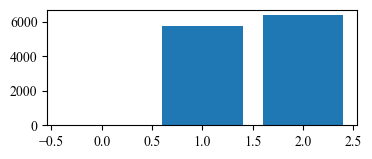

In [18]:
fig, ax = plt.subplots(figsize=(4, 1.5))
plt.bar(range(len(noise)), noise)
plt.show()

In [19]:
np.matmul(np.eye(3), np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]))

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])